In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn.svm
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy
import matplotlib.pyplot
  
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [3]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [5]:
attacks_types = {
    'normal': '1',
'back': '2',
'buffer_overflow': '3',
'ftp_write': '4',
'guess_passwd': '4',
'imap': '4',
'ipsweep': '5',
'land': '2',
'loadmodule': '3',
'multihop': '4',
'neptune': '2',
'nmap': '5',
'perl': '3',
'phf': '4',
'pod': '2',
'portsweep': '5',
'rootkit': '3',
'satan': '5',
'smurf': '2',
'spy': '4',
'teardrop': '2',
'warezclient': '4',
'warezmaster': '4',
}

In [6]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)
 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [7]:

df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [8]:
df['Attack Type'].value_counts()


2    391458
1     97278
5      4107
4      1126
3        52
Name: Attack Type, dtype: int64

In [9]:
df.dtypes


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'service', 'protocol_type']

In [12]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [13]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                       0.000000
num_outbound_cmds                   0.000000
urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compro

In [14]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [15]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [16]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [17]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)


In [18]:

df.drop('service',axis = 1,inplace= True)

In [19]:
df = df.drop(['target',], axis=1)
print(df.shape)

Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [20]:
data_inputs = X_train
data_outputs = Y_train.values.ravel()

In [21]:
#Genetic Algorithm Starting.

In [22]:
def reduce_features(solution, features):
    selected_elements_indices = numpy.where(solution == 1)[0]
    reduced_features = features[:, selected_elements_indices]
    return reduced_features


def classification_accuracy(labels, predictions):
    correct = numpy.where(labels == predictions)[0]
    accuracy = correct.shape[0]/labels.shape[0]
    return accuracy


def cal_pop_fitness(pop, features, labels, train_indices, test_indices):
    accuracies = numpy.zeros(pop.shape[0])
    idx = 0

    for curr_solution in pop:
        reduced_features = reduce_features(curr_solution, features)
        train_data = reduced_features[train_indices, :]
        test_data = reduced_features[test_indices, :]
      

        train_labels = labels[train_indices]
        test_labels = labels[test_indices]


        SV_classifier = sklearn.svm.SVC(gamma='scale')
        SV_classifier.fit(X=train_data, y=train_labels)

        predictions = SV_classifier.predict(test_data)
        accuracies[idx] = classification_accuracy(test_labels, predictions)
        idx = idx + 1
    return accuracies

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover, num_mutations=2):
    mutation_idx = numpy.random.randint(low=0, high=offspring_crossover.shape[1], size=num_mutations)
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        offspring_crossover[idx, mutation_idx] = 1 - offspring_crossover[idx, mutation_idx]
    return offspring_crossover

In [23]:
num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]

In [24]:
train_indices = numpy.arange(1, num_samples, 4)
test_indices = numpy.arange(0, num_samples, 4)
print(test_indices.shape)
test_indices.shape
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

(82749,)
Number of training samples:  82749
Number of test samples:  82749


In [25]:
"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""

'\nGenetic algorithm parameters:\n    Population size\n    Mating pool size\n    Number of mutations\n'

In [26]:
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.

In [27]:
# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

In [28]:
# Creating the initial population.
new_population = numpy.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)


(8, 32)


In [29]:
start_time = time.time()
best_outputs = []
num_generations = 1
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
end_time = time.time()

Generation :  0
Best result :  0.9930391908059312


In [30]:
ga_train = end_time - start_time
ga_train

104.70939517021179

In [31]:
start_time = time.time()
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]
end_time = time.time()
ga_best_sol = end_time - start_time

In [32]:
ga_best_sol

143.6621232032776

In [33]:
best_solution = new_population[best_match_idx, :]
best_solution_indices = numpy.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

In [34]:
print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

best_match_idx :  0
best_solution :  [0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0]
Selected indices :  [ 1  4  6 10 11 14 15 18 19 21 22 24 25 26 27 28 29 30]
Number of selected elements :  18
Best solution fitness :  0.9930391908059312


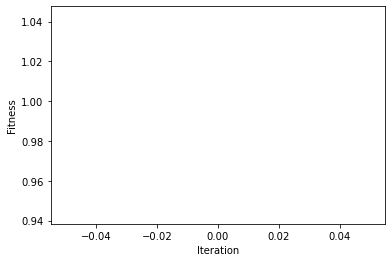

In [35]:
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [36]:
#Example output of Genetic Algorithm Reduction.

In [37]:
"""

 0  1  2  6  8  9 10 15 16 18 19 20 22 23 24 25 29 30 31 

duration   
protocol_type                    
flag        
wrong_fragment     
hot      
num_failed_logins                
logged_in                        
num_shells                       
num_access_files                 
is_host_login                    
is_guest_login                   
count                            
serror_rate                    
rerror_rate                    
same_srv_rate                  
diff_srv_rate                  
dst_host_diff_srv_rate         
dst_host_same_src_port_rate    
dst_host_srv_diff_host_rate           
"""

'\n\n 0  1  2  6  8  9 10 15 16 18 19 20 22 23 24 25 29 30 31 \n\nduration   \nprotocol_type                    \nflag        \nwrong_fragment     \nhot      \nnum_failed_logins                \nlogged_in                        \nnum_shells                       \nnum_access_files                 \nis_host_login                    \nis_guest_login                   \ncount                            \nserror_rate                    \nrerror_rate                    \nsame_srv_rate                  \ndiff_srv_rate                  \ndst_host_diff_srv_rate         \ndst_host_same_src_port_rate    \ndst_host_srv_diff_host_rate           \n'

In [38]:
#Modify the original dataset and select only relevant features.

In [39]:
dfObj = pd.DataFrame(df)
tt= dfObj.iloc[: , best_solution_indices]

In [40]:
#Fuzzy C Means Clustering starting.

In [41]:
import numpy as np, numpy.random
import pandas as pd
from scipy.spatial import distance
k = 2
p = 5
dat = df.drop(['Attack Type',], axis=1)

In [42]:
n = len(dat)
d = len(dat.columns)
addZeros = np.zeros((n, 1))
dat = np.append(dat, addZeros, axis=1)
print("The FCM algorithm: \n")
print("The training data: \n", dat)
print("\nTotal number of data: ",n)
print("Total number of features: ",d)
print("Total number of Clusters: ",k)

The FCM algorithm: 

The training data: 
 [[0.   1.   0.   ... 0.11 0.   0.  ]
 [0.   1.   0.   ... 0.05 0.   0.  ]
 [0.   1.   0.   ... 0.03 0.   0.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 0.  ]
 [0.   1.   0.   ... 0.04 0.05 0.  ]
 [0.   1.   0.   ... 0.17 0.05 0.  ]]

Total number of data:  494021
Total number of features:  32
Total number of Clusters:  2


In [43]:
C = np.zeros((k,d+1))
C

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [44]:
weight = np.random.dirichlet(np.ones(k),size=n)
print("\nThe initial weight: \n", np.round(weight,2))


The initial weight: 
 [[0.73 0.27]
 [0.37 0.63]
 [0.95 0.05]
 ...
 [0.77 0.23]
 [0.94 0.06]
 [0.48 0.52]]


In [45]:
weight.shape

(494021, 2)

In [46]:
for it in range(3): # Total number of iterations
    
    # Compute centroid
    for j in range(k):
        denoSum = sum(np.power(weight[:,j],2))
        
        sumMM =0
        for i in range(n):
            mm = np.multiply(np.power(weight[i,j],p),dat[i,:])
            sumMM +=mm
        cc = sumMM/denoSum
        C[j] = np.reshape(cc,d+1)
 
    #Updating the fuzzy pseudo partition
    for i in range(n):
        denoSumNext = 0
        for j in range(k):
             denoSumNext += np.power(1/distance.euclidean(C[j,0:d], dat[i,0:d]),1/(p-1))
        for j in range(k):
            w = np.power((1/distance.euclidean(C[j,0:d], dat[i,0:d])),1/(p-1))/denoSumNext
            weight[i,j] = w

In [47]:
print("\nThe final weights: \n", np.round(weight,2))


The final weights: 
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


In [48]:
for i in range(n):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    dat[i,d] = cNumber[0]
    
print("\nThe data with cluster number: \n", dat)


The data with cluster number: 
 [[0.   1.   0.   ... 0.11 0.   1.  ]
 [0.   1.   0.   ... 0.05 0.   1.  ]
 [0.   1.   0.   ... 0.03 0.   1.  ]
 ...
 [0.   1.   0.   ... 0.06 0.05 1.  ]
 [0.   1.   0.   ... 0.04 0.05 1.  ]
 [0.   1.   0.   ... 0.17 0.05 1.  ]]


In [49]:
# Sum squared error calculation
SSE = 0
for j in range(k):
    for i in range(n):
        SSE += np.power(weight[i,j],p)*distance.euclidean(C[j,0:d], dat[i,0:d])

print("\nSSE: ",np.round(SSE,4))


SSE:  122824578.0189


In [50]:
#set column names to the output of the fuzzy c means clustering algorithm.

In [51]:
cont = pd.DataFrame(dat, columns=['urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','cluster'])

In [52]:
#select all records in cluster 1.

In [53]:
ss = np.flatnonzero(cont['cluster'])

In [54]:
ss.shape

(197421,)

In [55]:
#Create new dataset with improved features and relevant records.

In [56]:
testObj = pd.DataFrame(df)
tes= testObj.iloc[ss , best_solution_indices]

In [57]:
tes

,duration,protocol_type,src_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,root_shell,...,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_src_port_rate
0,0,1,181,0,0,0,0,0,1,0,...,0,0,0,8,8,0.0,0.0,0.00,9,0.11
1,0,1,239,0,0,0,0,0,1,0,...,0,0,0,8,8,0.0,0.0,0.00,19,0.05
2,0,1,235,0,0,0,0,0,1,0,...,0,0,0,8,8,0.0,0.0,0.00,29,0.03
3,0,1,219,0,0,0,0,0,1,0,...,0,0,0,6,6,0.0,0.0,0.00,39,0.03
4,0,1,217,0,0,0,0,0,1,0,...,0,0,0,6,6,0.0,0.0,0.00,49,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,310,0,0,0,0,0,1,0,...,0,0,0,4,5,0.0,0.0,0.40,255,0.01
494017,0,1,282,0,0,0,0,0,1,0,...,0,0,0,6,6,0.0,0.0,0.00,255,0.17
494018,0,1,203,0,0,0,0,0,1,0,...,0,0,0,6,18,0.0,0.0,0.17,255,0.06
494019,0,1,291,0,0,0,0,0,1,0,...,0,0,0,6,12,0.0,0.0,0.17,255,0.04


In [40]:
fet = testObj.iloc[ss , ]

NameError: name 'testObj' is not defined

In [ ]:
fet

In [ ]:
print(cNumber)

In [ ]:
count = 0

In [ ]:
df

In [ ]:
dat.shape

In [ ]:
#Implementation of the new improved dataset onto a classifier.

In [40]:
print(tt.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = tt

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 18)
(330994, 18) (163027, 18)
(330994, 1) (163027, 1)


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model3 = RandomForestClassifier(n_estimators=30)

In [43]:
start_time = time.time()
rf = model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
rf_train_time = end_time-start_time

In [44]:
print("Training time: ",end_time-start_time)

Training time:  4.5397889614105225


In [45]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
rf_test_time = end_time-start_time

In [46]:
print("Testing time: ",end_time-start_time)

Testing time:  0.3351163864135742


In [47]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999637455663849
Test score is: 0.9993988725793886


In [48]:
rf_test_score = model3.score(X_test,Y_test)
rf_train_score = model3.score(X_train, Y_train)

In [49]:
fet

NameError: name 'fet' is not defined

In [ ]:
#CNN Implementation

In [50]:
tes

NameError: name 'tes' is not defined

In [52]:
td = tt

In [53]:

Y = df[['Attack Type']]

In [54]:

lm = 16

In [55]:
a = len(td.columns)

In [56]:

b = a-lm
b

2

In [57]:
count = 0

In [58]:
for i in range(b):
    count +=1
    td = td.iloc[:,:-1]

In [59]:

X = td

In [60]:

X

,protocol_type,dst_bytes,wrong_fragment,logged_in,num_compromised,num_file_creations,num_shells,is_host_login,is_guest_login,srv_count,serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count
0,1,5450,0,1,0,0,0,0,0,8,0.00,1.0,0.0,0.00,9,9
1,1,486,0,1,0,0,0,0,0,8,0.00,1.0,0.0,0.00,19,19
2,1,1337,0,1,0,0,0,0,0,8,0.00,1.0,0.0,0.00,29,29
3,1,1337,0,1,0,0,0,0,0,6,0.00,1.0,0.0,0.00,39,39
4,1,2032,0,1,0,0,0,0,0,6,0.00,1.0,0.0,0.00,49,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1,1881,0,1,0,0,0,0,0,5,0.00,1.0,0.0,0.40,86,255
494017,1,2286,0,1,0,0,0,0,0,6,0.00,1.0,0.0,0.00,6,255
494018,1,1200,0,1,0,0,0,0,0,18,0.17,1.0,0.0,0.17,16,255
494019,1,1200,0,1,0,0,0,0,0,12,0.00,1.0,0.0,0.17,26,255


In [61]:
X = X.values.reshape(-1,4,4,1)

print("x_train shape: ",X.shape)

x_train shape:  (494021, 4, 4, 1)


In [62]:
X_train.shape

(330994, 18)

In [63]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y = to_categorical(Y, num_classes = 10)
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 4, 4, 1) (163027, 4, 4, 1)
(330994, 10) (163027, 10)


In [64]:

Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [65]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu', input_shape = (4,4,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [66]:
model.add(Dense(10, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

C:\Users\BadWolf\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [67]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [68]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [69]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [70]:
start_time = time.time()

In [71]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch=X_train.shape[0] // batch_size)

C:\Users\BadWolf\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1323/1323 [==============================] - 41s 31ms/step - loss: 0.9770 - accuracy: 0.8114 - val_loss: 0.3563 - val_accuracy: 0.9688
Epoch 2/5
1323/1323 [==============================] - 41s 31ms/step - loss: 0.2180 - accuracy: 0.9721 - val_loss: 0.1755 - val_accuracy: 0.9695
Epoch 3/5
1323/1323 [==============================] - 41s 31ms/step - loss: 0.1392 - accuracy: 0.9743 - val_loss: 0.1286 - val_accuracy: 0.9735
Epoch 4/5
1323/1323 [==============================] - 41s 31ms/step - loss: 0.1158 - accuracy: 0.9747 - val_loss: 0.1009 - val_accuracy: 0.9737
Epoch 5/5
1323/1323 [==============================] - 41s 31ms/step - loss: 0.1036 - accuracy: 0.9751 - val_loss: 0.0968 - val_accuracy: 0.9725


In [72]:
end_time = time.time()
cnn_train_time = end_time-start_time
cnn_accuracy = history.history['accuracy']

In [73]:
cnn_train_time

205.3909146785736

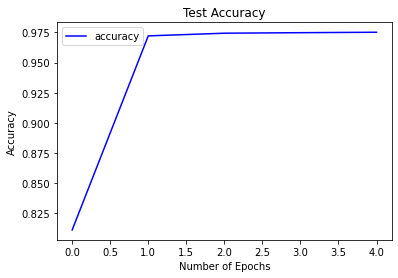

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['accuracy'], color='b', label="accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
#Implementation of other models and comparison

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [77]:
# Target variable and train set
Y = df[['Attack Type']]
X = tt

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 18) (163027, 18)
(330994, 1) (163027, 1)


In [78]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [79]:
model1 = GaussianNB()

In [80]:
start_time = time.time()
nb = model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
nb_train_time = end_time-start_time

In [81]:
print("Training time: ",end_time-start_time)

Training time:  0.33610033988952637


In [82]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
nb_test_time = end_time-start_time

In [83]:
print("Testing time: ",end_time-start_time)

Testing time:  0.1351485252380371


In [84]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))
nb_train_accuracy = model1.score(X_train, Y_train)
nb_test_accuracy = model1.score(X_test,Y_test)

Train score is: 0.8806292561194463
Test score is: 0.8800260079618714


In [85]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [86]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [87]:
start_time = time.time()
dt = model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
dt_train_time = end_time-start_time

In [88]:
print("Training time: ",end_time-start_time)

Training time:  0.5533931255340576


In [89]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
dt_test_time = end_time-start_time

In [90]:
print("Testing time: ",end_time-start_time)

Testing time:  0.01195979118347168


In [91]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))
dt_train_score = model2.score(X_train, Y_train)
dt_test_score = model2.score(X_test,Y_test)

Train score is: 0.9917883707861774
Test score is: 0.9914001975132953


In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
model3 = RandomForestClassifier(n_estimators=30)

In [94]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [95]:
print("Training time: ",end_time-start_time)

Training time:  4.385629177093506


In [96]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [97]:
print("Testing time: ",end_time-start_time)

Testing time:  0.3321108818054199


In [98]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999637455663849
Test score is: 0.9993988725793886


In [99]:
from sklearn.svm import SVC

In [100]:
model4 = SVC(gamma = 'scale')

In [101]:
start_time = time.time()
sv = model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
sv_train_time = end_time-start_time

In [102]:
print("Training time: ",end_time-start_time)

Training time:  194.23135662078857


In [103]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
sv_test_time = end_time-start_time

In [104]:
print("Testing time: ",end_time-start_time)

Testing time:  19.26202964782715


In [105]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))
sv_train_score = model4.score(X_train, Y_train)
sv_test_score = model4.score(X_test,Y_test)

Train score is: 0.993601092466933
Test score is: 0.9938292430088268


In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
model6 = GradientBoostingClassifier(random_state=0)

In [108]:
start_time = time.time()
gb = model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
gb_train_time = end_time-start_time

In [109]:
print("Training time: ",end_time-start_time)

Training time:  166.10827112197876


In [110]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
gb_test_time = end_time-start_time

In [111]:
print("Testing time: ",end_time-start_time)

Testing time:  0.6560332775115967


In [112]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))
gb_train_score = model6.score(X_train, Y_train)
gb_test_score = model6.score(X_test,Y_test)

Train score is: 0.9986827555786509
Test score is: 0.998478779588657


In [113]:
#Artificial Neural Network

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [116]:
size = len(tt.columns)

In [117]:
size

18

In [118]:
def fun():
    modelAnn = Sequential()
    
    #here 30 is output dimension
    modelAnn.add(Dense(size,input_dim =size,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    modelAnn.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    modelAnn.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    modelAnn.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return modelAnn

In [119]:
X_train.shape

(330994, 18)

In [120]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [121]:
start = time.time()
ann = model7.fit(X_train, Y_train.values.ravel())
end = time.time()
ann_train_time = end_time-start_time

Epoch 1/100
5172/5172 [==============================] - 13s 439us/step - loss: 0.7196 - accuracy: 0.7628
Epoch 2/100
5172/5172 [==============================] - 2s 439us/step - loss: 0.0956 - accuracy: 0.9840
Epoch 3/100
5172/5172 [==============================] - 2s 437us/step - loss: 0.0736 - accuracy: 0.9843
Epoch 4/100
5172/5172 [==============================] - 2s 440us/step - loss: 0.0711 - accuracy: 0.9844
Epoch 5/100
5172/5172 [==============================] - 2s 443us/step - loss: 0.0692 - accuracy: 0.9846
Epoch 6/100
5172/5172 [==============================] - 2s 450us/step - loss: 0.0658 - accuracy: 0.9845
Epoch 7/100
5172/5172 [==============================] - 2s 443us/step - loss: 0.0613 - accuracy: 0.9842
Epoch 8/100
5172/5172 [==============================] - 2s 445us/step - loss: 0.0579 - accuracy: 0.9846
Epoch 9/100
5172/5172 [==============================] - 2s 442us/step - loss: 0.0560 - accuracy: 0.9849
Epoch 10/100
5172/5172 [==============================

Epoch 78/100
5172/5172 [==============================] - 2s 439us/step - loss: 0.0361 - accuracy: 0.9923
Epoch 79/100
5172/5172 [==============================] - 2s 438us/step - loss: 0.0354 - accuracy: 0.9923
Epoch 80/100
5172/5172 [==============================] - 2s 439us/step - loss: 0.0356 - accuracy: 0.9917
Epoch 81/100
5172/5172 [==============================] - 2s 439us/step - loss: 0.0349 - accuracy: 0.9920
Epoch 82/100
5172/5172 [==============================] - 2s 443us/step - loss: 0.0333 - accuracy: 0.9918
Epoch 83/100
5172/5172 [==============================] - 2s 445us/step - loss: 0.0333 - accuracy: 0.9920
Epoch 84/100
5172/5172 [==============================] - 2s 439us/step - loss: 0.0314 - accuracy: 0.9920
Epoch 85/100
5172/5172 [==============================] - 2s 441us/step - loss: 0.0310 - accuracy: 0.9918
Epoch 86/100
5172/5172 [==============================] - 2s 439us/step - loss: 0.0295 - accuracy: 0.9920
Epoch 87/100
5172/5172 [======================

In [122]:
print('Training time')
print((end-start))

Training time
239.7168107032776


In [123]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()
ann_test_time = end_time-start_time

C:\Users\BadWolf\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [124]:
print("Testing time: ",end_time-start_time)

Testing time:  0.8099277019500732


In [125]:
start_time = time.time()
Y_train_pred7 = model7.predict(X_train)
end_time = time.time()

In [126]:
ann_train_score = accuracy_score(Y_train,Y_train_pred7)
ann_train_score

0.9921841483531424

In [127]:
ann_test_score = accuracy_score(Y_test,Y_test_pred7)
ann_test_score

0.992050396560079

In [128]:
#Training Accuracy

In [129]:
cnn_accuracy_train = cnn_accuracy[-1]

<BarContainer object of 7 artists>

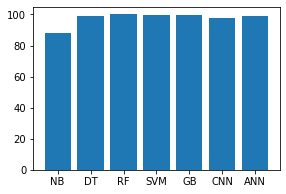

In [130]:
names = ['NB','DT','RF','SVM','GB','CNN','ANN']
values = [nb_train_accuracy*100,dt_train_score*100,rf_train_score*100,sv_train_score*100,gb_train_score*100,cnn_accuracy_train*100,ann_train_score*100]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
#plt.ylim(80,102)
plt.bar(names,values)

In [131]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

In [132]:
#Testing Accuracy

<BarContainer object of 7 artists>

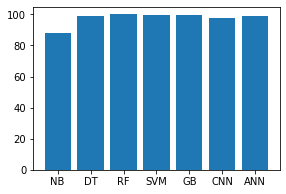

In [133]:
names = ['NB','DT','RF','SVM','GB','CNN','ANN']
values = [nb_test_accuracy*100,dt_test_score*100,rf_test_score*100,sv_test_score*100,gb_test_score*100,cnn_accuracy_train*100,ann_test_score*100]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
#plt.ylim(80,102)
plt.bar(names,values)

In [134]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

In [135]:
#Training Time

<BarContainer object of 7 artists>

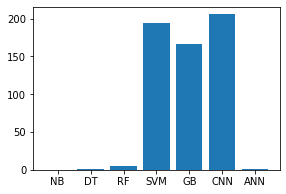

In [136]:
names = ['NB','DT','RF','SVM','GB','CNN','ANN']
values = [nb_train_time,dt_train_time,rf_train_time,sv_train_time,gb_train_time,cnn_train_time,ann_train_time]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [137]:
f.savefig('train_time_figure.png',bbox_inches='tight')

In [138]:
#Testing Time

<BarContainer object of 7 artists>

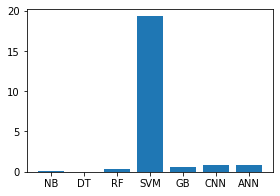

In [139]:
names = ['NB','DT','RF','SVM','GB','CNN','ANN']
values = [nb_test_time,dt_test_time,rf_test_time,sv_test_time,gb_test_time,0.833560,ann_test_time]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [140]:
f.savefig('test_time_figure.png',bbox_inches='tight')